![Tinder](https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Tinder-Symbole.png)

# Speed Dating with Tinder

## Company's description 📇

<a href="https://tinder.com/" target="_blank">Tinder</a> is an online dating and geosocial networking application. In Tinder, users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photos, a short bio, and a list of their interests. 

Tinder was launched by Sean Rad at a hackathon held at the Hatch Labs incubator in West Hollywood in 2012.

As of 2021, Tinder has recorded more than 65 billion matches worldwide.

## Project 🚧

The marketing team needs help on a new project. They are experiencing a decrease in the number of matches, and they are trying to find a way to understand **what makes people interested into each other**. 

They decided to run a speed dating experiment with people who had to give Tinder lots of informations about themselves that could ultimately reflect on ther dating profile on the app.

Tinder then gathered the data from this experiment. Each row in the dataset represents one speed date between two people, and indicates wether each of them secretly agreed to go on a second date with the other person.

## Goals 🎯

Use the dataset to understand what makes people interested into each other to go on a second date together:
* You may use descriptive statistics
* You may use visualisations

# **1. Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.tools as tls
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# **2. Let's explore the data**

In [3]:
data = pd.read_csv("https://storage.googleapis.com/jedha-projects/Speed_Dating_Data.csv", encoding = "ISO-8859-1")

In [4]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [6]:
print(f"number of rows :", data.shape[0])
print()

print(f"number of columns :", data.shape[1])
print()

print("Display of dataset : ")
display(data.head())

print("Basic statistics : ")
data_desc = data.describe(include="all")
display(data_desc)
print()

print("Percentage of missing values : ")
display(100*data.isnull().sum()/data.shape[0])

number of rows : 8378

number of columns : 195

Display of dataset : 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

Basic statistics : 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Percentage of missing values : 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
wave         0.000000
round        0.000000
position     0.000000
positin1    22.033898
order        0.000000
partner      0.000000
pid          0.119360
match        0.000000
int_corr     1.885892
samerace     0.000000
age_o        1.241346
race_o       0.871330
pf_o_att     1.062306
pf_o_sin     1.062306
pf_o_int     1.062306
pf_o_fun     1.169730
pf_o_amb     1.277154
pf_o_sha     1.539747
dec_o        0.000000
attr_o       2.530437
sinc_o       3.425639
intel_o      3.652423
fun_o        4.296968
amb_o        8.617809
shar_o      12.843161
like_o       2.984006
prob_o       3.795655
met_o        4.595369
age          1.133922
field        0.751969
field_cd     0.978754
undergra    41.346383
mn_sat      62.604440
tuition     57.233230
race         0.751969
imprace      0.942946
imprelig     0.942946
from         0.942946
zipcode     12.699928
income      48.925758
goal      

In [7]:
print(data.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

# **3. Cleaning up and determining focus**

In [8]:
# Dealing with missing values in date_3
data.date_3.fillna(0,inplace=True)
data['date_3'] = data.date_3.map({1 : 'Yes', 0 : 'No'}).fillna(data.date_3)
data['dec_o'] = data.dec_o.map({1 : 'Yes', 0 : 'No'}).fillna(data.dec_o)
data['dec'] = data.dec.map({1 : 'Yes', 0 : 'No'}).fillna(data.dec)

In [9]:
# Rename columns
data.rename(columns={"gender": "Gender", 
                     "condtn":"Condition",
                     "mn_sat":"median_sat",
                     "age_o":"age of partner",
                     "race_o":"race of partner",
                     "pf_o_att":"partner stated preference",
                     "dec_o":"partner's decision",
                     "attr_o":"partner rating of attributes",
                     "imprace":"race importance",
                     "imprelig":"religion importance",
                     "from":"originally from",
                     "date":"frequency of date"}, inplace=True)

# Replace values
race_replacement={1:"Black/African American",
                 2: "European/Caucasion-American",
                 3: "Latino/Hispanic American",
                 4: "Asian/Pacific Islander/Asian-American",
                 5: "Native American",
                 6: "Other"}

field_replacement={1:"Law",
                   2:"Math",
                   3:"Social Science, Psychologist",
                   4:"Medican Science, Pharmaceuticals, and Bio Tech",
                   5:"Engineering",
                   6:"English/Creative Writing / Journalism",
                   7:"History/ Religion/ Philosophy",
                   8:"Business/Econ/Finance",
                   9:"Education, Academia",
                   10:"Biological Sciences / Chemistry/ Physics",
                   11:"Social Work",
                   12:"Undergrad/undecided",
                   13:"Political Science/ International Affairs",
                   14:"Film",
                   15:"Fine Arts / Arts Administration",
                   16:"Languages",
                   17:"Architecture",
                   18:"Other"}

career_replacement={1: "Lawyer",
                   2:  "Academic / Research",
                   3:  "Psychologist",
                   4:  "Doctor/Medicine",
                   5:  "Engineer",
                   6:  "Creative Arts/ Entertainment",
                   7:  "Banking / Consulting /Finance / Marketing/ Business /CEO/ Entrepreneur / Admin",
                   8:  "Real Estate",
                   9:  "International /Humanitarian Affairs",
                   10:  "Undecided",
                   11:  "Social Work",
                   12:  "Speech Pathology",
                   13:  "Politics",
                   14:  "Pro Sports / Athletics",
                   15:  "Other",
                   16:  "Journalism",
                   17:  "Architecture"}

decision_replacement={1:"Yes", 0:"No"}
length_replacement={1:"Too little",
                   2: "Too much",
                   3: "Just Right"}
goal_replacement={1:"Seemed like a fun night out",
                 2: "To meet new people",
                 3: "To get a date",
                 4:"Looking for serious relationship",
                 5:"To say I did it",
                 6: "Other"}
frequency_replacement={1:"Several times a week",
                      2: "Twice a week",
                      3: "Once a week",
                      4: "Twice a month",
                      5: "Once a month",
                      6: "Several times a year",
                      7: "Almost never"}


In [10]:
data["Gender"].replace({0:"Female",1:"Male"}, inplace=True)
data["Condition"].replace({1:"Limited choice", 2:"Extensive choice"}, inplace=True)
data["match"].replace({1:"Yes",0:"No"}, inplace=True)
data["samerace"].replace({1:"Yes",0:"No"},inplace=True)
data["race of partner"].replace(race_replacement, inplace=True)
data["partner's decision"].replace(decision_replacement, inplace=True)
data["field_cd"].replace(field_replacement, inplace=True)
data["race"].replace(race_replacement, inplace=True)
data["career_c"].replace(career_replacement, inplace=True)
data["length"].replace(length_replacement, inplace=True)
data["numdat_2"].replace({1:"Too few", 2: "Too many", 3: "Just Right"}, inplace=True)
data["date_3"].replace({1:"Yes", 2:"No", 0:np.nan}, inplace=True)
data["goal"].replace(goal_replacement, inplace=True)
data["frequency of date"].replace(frequency_replacement, inplace=True)
data["go_out"].replace(frequency_replacement, inplace=True)



In [11]:
data.head()

,iid,id,Gender,idg,Condition,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age of partner,race of partner,partner stated preference,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,partner's decision,partner rating of attributes,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,median_sat,tuition,race,race importance,religion importance,originally from,zipcode,income,goal,frequency of date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Female,1,Limited choice,1,10,7,NaN,4,1,11.0,No,0.14,No,27.0,European/Caucasion-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,No,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,Limited choice,1,10,7,NaN,3,2,12.0,No,0.54,No,22.0,European/Caucasion-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,Too much,Too few,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,No,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,Limited choice,1,10,7,NaN,10,3,13.0,Yes,0.16,Yes,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,Law,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",To meet new people,Almost never,Several times a week,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,N

In [14]:
# Let's count the number of females and males.
print(data['Gender'].value_counts())

color_map = {'Female': '#A95EB6', 'Male': '#00008b'}  # Replace these with your desired colors
fig = px.histogram(data, x= 'Gender', 
                   color= 'Gender',
                   barmode="group", color_discrete_map=color_map,
                   title=f"Count of females and males" )
fig.update_layout(legend_title_text='Gender')

Gender
Male      4194
Female    4184
Name: count, dtype: int64


We can see that there are as many males as females.

## Age

In [15]:
# Let's check the age distribution vs gender

fig = make_subplots(rows=1, cols=2)

# Add histograms with color
fig.add_trace(go.Histogram(x=data[data['Gender'] == 'Female'].age, name='Female', nbinsx=74, marker_color='#A95EB6'), row=1, col=1)
fig.add_trace(go.Histogram(x=data[data['Gender'] == 'Male'].age, name='Male', nbinsx=74, marker_color='#00008b'), row=1, col=1)

# Add box plots with color
fig.add_trace(go.Box(y=data[data['Gender'] == 'Female'].age, x=[0] * data[data['Gender'] == 'Female'].shape[0], name='Female_box', marker_color='#A95EB6'), row=1, col=2)
fig.add_trace(go.Box(y=data[data['Gender'] == 'Male'].age, x=[1] * data[data['Gender'] == 'Male'].shape[0], name='Male_box', marker_color='#00008b'), row=1, col=2)

fig.update_layout(height=600, width=1100, barmode='stack', title_text="Age distribution for females and males")
fig.show()

The survey was done on individuals between 18 and 55 years. We can see in the two graphs that more than 80% of the participants are between age 20 and 30 years old.

## Study

In [16]:
# Gender distribution over fields of study
fig = make_subplots(cols=3, rows= 3, specs=[[{"type": "pie"},{"type": "pie"},{"type": "pie"}],
                                            [{"type": "pie"},{"type": "pie"},{"type": "pie"}],
                                            [{"type": "pie"},{"type": "pie"},{"type": "pie"}]])
for i, field in enumerate(data['field'].value_counts().index[0:9]):
    fig.add_trace(
        go.Pie(labels=data[data['field'] == field].Gender, title= field.upper(), name= field.upper(), hole=.5), 
        row= int(i/3) + 1, col= int(i%3) + 1)

fig.update_layout(height= 1000, width= 1000, title='Gender distribution over fields of study', legend_title_text='Gender')
fig.show()

In [17]:
# so, what is match percent???

print(data['match'].value_counts()*100/len(data))

fig = go.Figure(data=[
    go.Pie(values= data['match'].value_counts(), 
           labels= ['No', 'Yes'],
           pull=[0, 0.20], 
           marker_colors= ['#FF4040', '#7AB02C'])
])

fig.update_layout(height = 600, width= 600,legend_title_text='Match', title=f"Count of matches/no-matches")

match
No     83.528288
Yes    16.471712
Name: count, dtype: float64


### Let's look closer to successfull matches to find out features :

In [18]:
# fig, axes = plt.subplots(1, 2, figsize=(17,5))
fig = make_subplots(rows=1, cols=2)

# The number of dates per person
num_dates_per_male = data[data.Gender == 'Male'].groupby('iid').apply(len)
num_dates_per_female = data[data.Gender == 'Female'].groupby('iid').apply(len)
fig.add_trace(go.Histogram(x= num_dates_per_male, name='Dates per male', nbinsx=30, marker_color='#00008b'), row=1, col=1)
fig.add_trace(go.Histogram(x= num_dates_per_female, name='Dates per female', nbinsx=30, marker_color='#A95EB6'), row=1, col=1)

# # The number of matches per person

matches = data[data.match == "Yes"]
matches_male = matches[matches.Gender == 'Male'].groupby('iid').apply(len)
matches_female = matches[matches.Gender == 'Female'].groupby('iid').apply(len)

# Calculate the match percentages
male_match_percentage = matches_male / num_dates_per_male
female_match_percentage = matches_female / num_dates_per_female

fig.add_trace(go.Histogram(x= male_match_percentage.dropna(), opacity=0.5, name='male match percentage', marker_color='#00008b'),
    row=1, col=2)
fig.add_trace(go.Histogram(x=female_match_percentage.dropna(), opacity=0.5, name='female match percentage', marker_color='#A95EB6'),
    row=1, col=2)

# fig.add_trace(go.Box(y= data[data['Gender'] == 'Female'].age, x= [0] * data[data['Gender'] == 'Female'].shape[0], name= 'Female_box'),row=1, col=2)
# fig.add_trace(go.Box(y= data[data['Gender'] == 'Male'].age, x= [1] * data[data['Gender'] == 'Male'].shape[0], name= 'Male_box'),row=1, col=2)
fig.update_layout(height=600, width=1100, title_text='Number of dates per male/female & Match percentages')
fig.show()
# axes[1].hist((matches_male / num_dates_per_male).dropna(), alpha=0.5, label='Male match percentage')
# axes[1].hist((matches_female / num_dates_per_female).dropna(), alpha=0.5, label='Female match percentage')
# axes[1].legend(loc='upper right')
# # axes[1].suptitle('Matches per person by gender')

print('Avg. dates per male: {0:.1f}\t\tAvg. dates per female: {1:.1f}\nAvg. male match percentage: {2:.1f}\tAvg. female match percentage: {3:.1f}'.format(
        num_dates_per_male.mean(), 
        num_dates_per_female.mean(),
        (matches_male / num_dates_per_male).mean() * 100.0,
        (matches_female / num_dates_per_female).mean() * 100.0))

Avg. dates per male: 15.1		Avg. dates per female: 15.3
Avg. male match percentage: 20.3	Avg. female match percentage: 20.9


## Traits

In [19]:
attributes_gender = data[['Gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('Gender').mean()
cols = ['Attractive','Sincere','Intelligent','Fun','Ambituous','Shared Interests']
attributes_gender.columns = cols

In [20]:
display(attributes_gender)

trace1 = go.Bar(
    y=list(attributes_gender.iloc[1]),
    x=attributes_gender.columns.values,
    name='Men',
    marker=dict(
        color='#00008b'
    )
)
trace2 = go.Bar(
    y=list(attributes_gender.iloc[0]),
    x=attributes_gender.columns.values,
    name='Women',
    marker=dict(
        color='#A95EB6'
    )
)

data1 = [trace1, trace2]
layout = go.Layout(
    title='What People Are Looking For in the Opposite Sex',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=18
        )
    )
)
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='barchart')

,Attractive,Sincere,Intelligent,Fun,Ambituous,Shared Interests
Gender,,,,,,
Female,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194
Male,26.921689,16.498436,19.537374,17.763893,8.552829,10.996574


Attraction emerges as the most significant trait among men, while intelligence takes precedence as the primary attribute for women. Among the traits considered least desirable in a male partner are ambition and shared interests, whereas for women, the least desirable traits are shared interests and ambition. In essence, ambition emerges as the least desirable trait for both genders.

In [21]:
attributes_gender_2 = data[['Gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('Gender').mean()
attributes_gender_2.columns = cols

In [22]:
attributes_gender_2

,Attractive,Sincere,Intelligent,Fun,Ambituous,Shared Interests
Gender,,,,,,
Female,35.694349,11.343646,12.532022,18.733510,9.230638,12.645113
Male,25.092631,15.181078,16.279633,18.115379,14.234815,11.071924


In [23]:
trace3 = go.Bar(
    y=list(attributes_gender_2.iloc[1]),
    x=attributes_gender_2.columns.values,
    name='Men',
    marker=dict(
        color='#00008b'
    )
)
trace4 = go.Bar(
    y=list(attributes_gender_2.iloc[0]),
    x=attributes_gender_2.columns.values,
    name='Women',
    marker=dict(
        color='#A95EB6'
    )
)

data2 = [trace3, trace4]
layout = go.Layout(
    title='What People Think the Opposite Sex is Looking For',
    font=dict(
        size=16
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig, filename='barchart')

Both men and women thought that attractiveness is the most important attribute. For men it is the most important attribute but not for women so the women were right but it was slightly less important than they thought it was. For women Intelligence is the most important attribute.

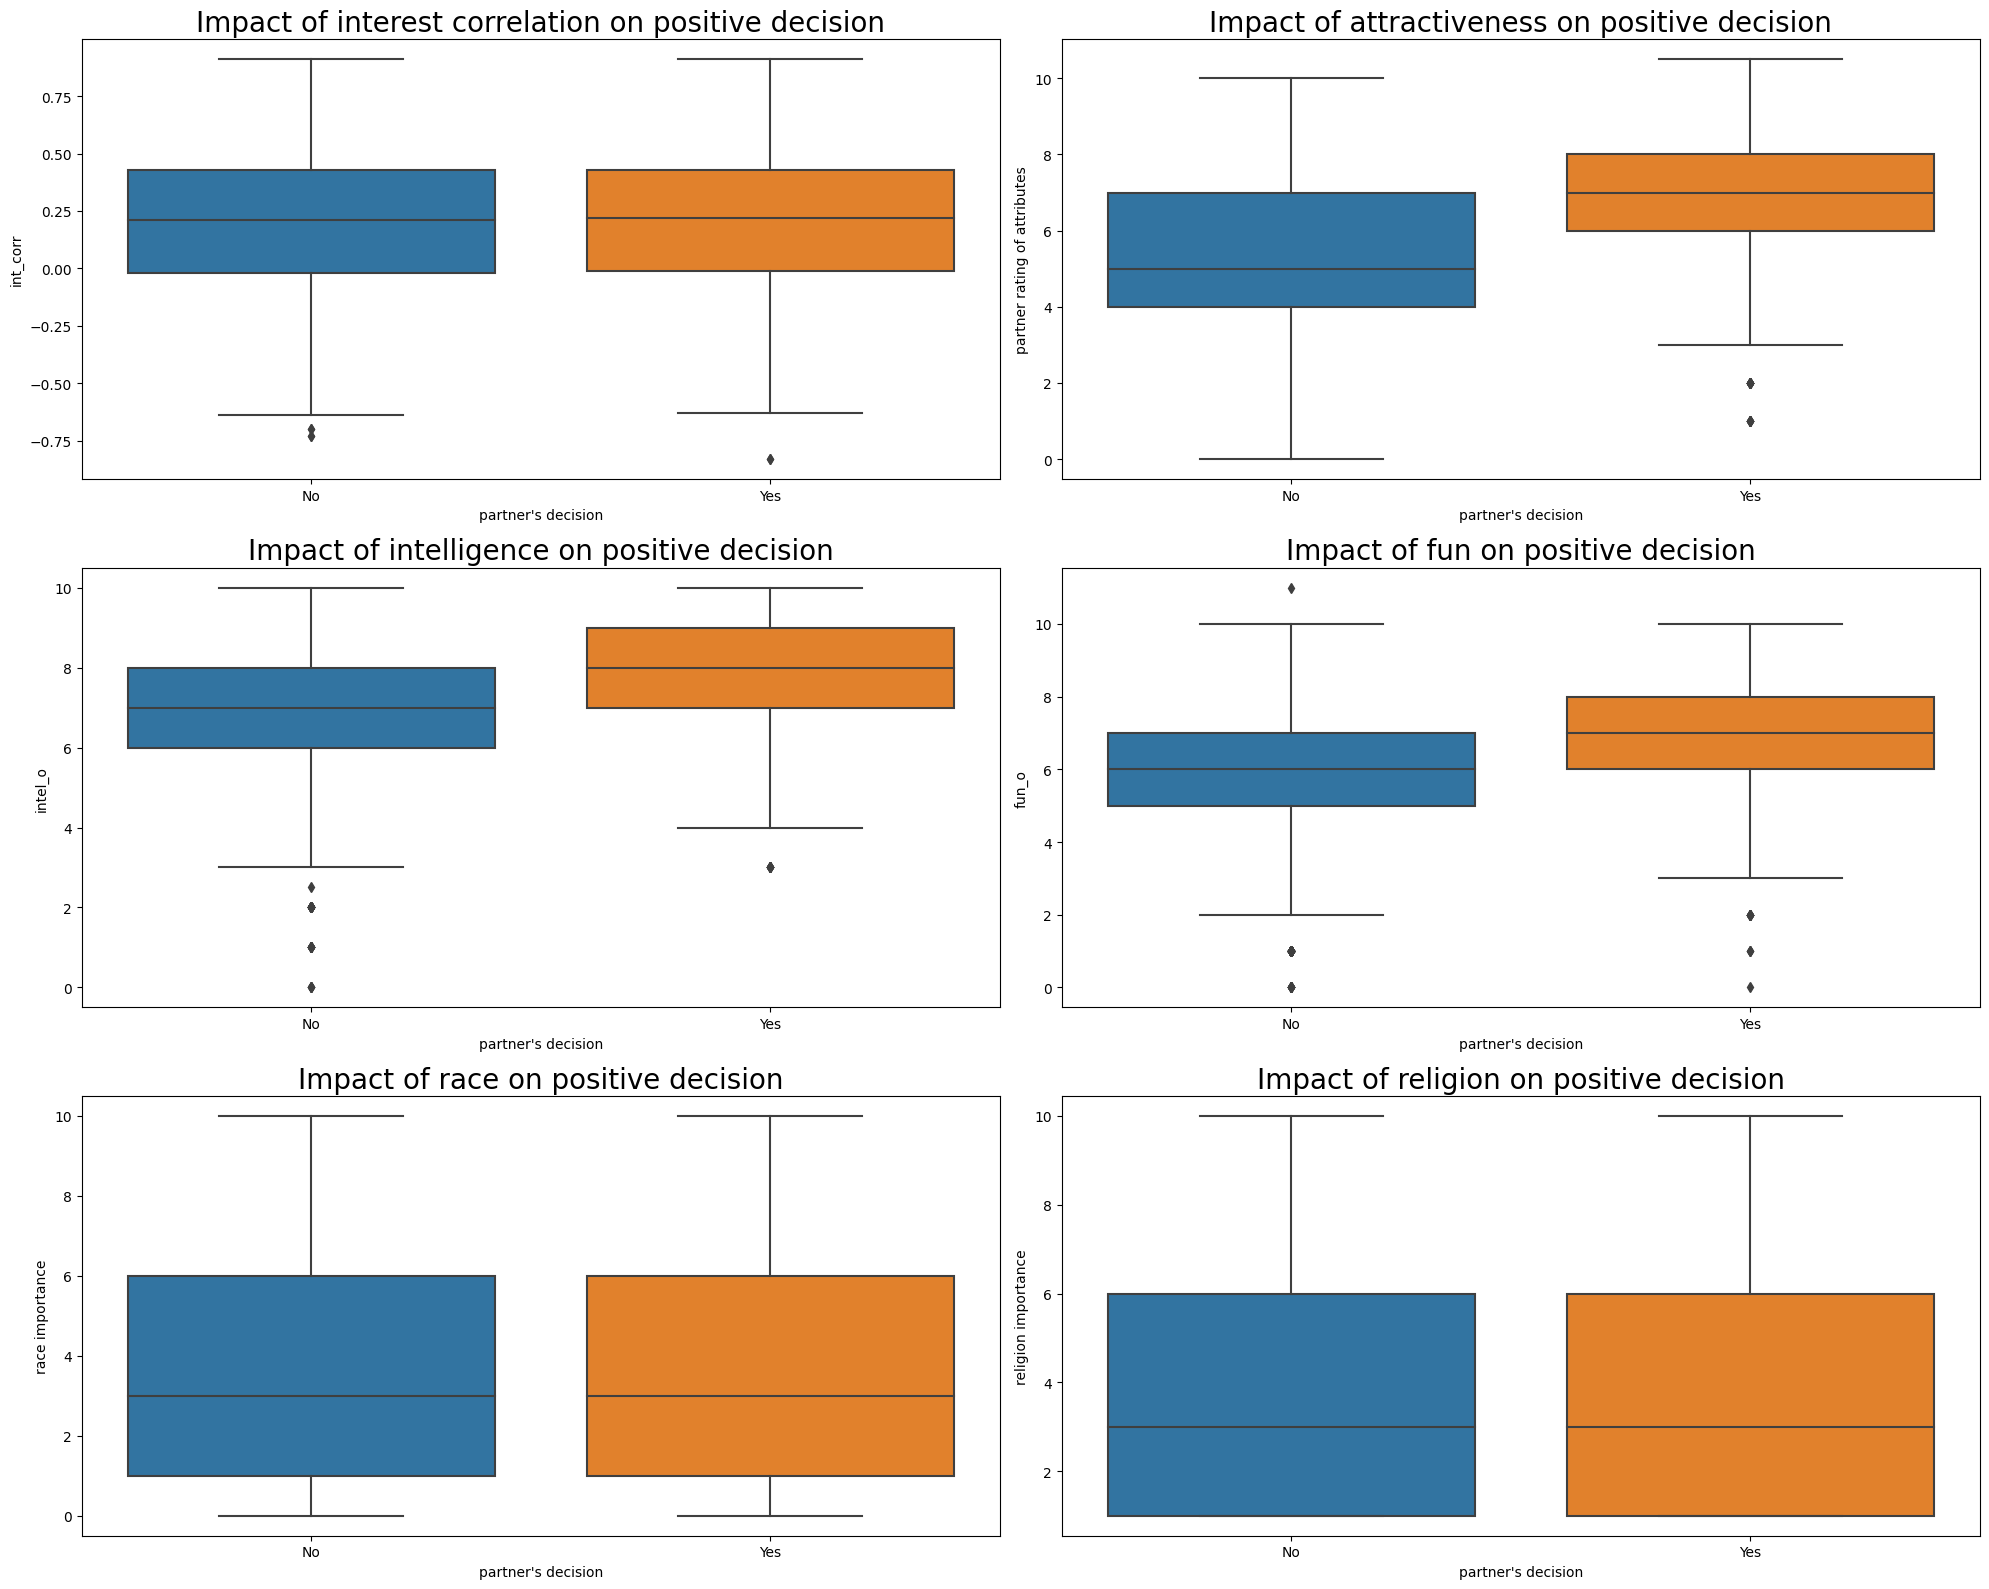

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))

# Visualize impact of interest correlation on positive decision
sns.boxplot(x="partner's decision", y='int_corr', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Impact of interest correlation on positive decision', fontsize = 20)

# Visualize impact of attractiveness on positive decision
sns.boxplot(x="partner's decision", y="partner rating of attributes", data=data, ax=axes[0, 1])
axes[0, 1].set_title('Impact of attractiveness on positive decision', fontsize = 20)

# Visualize impact of intelligence on positive decision
sns.boxplot(x="partner's decision", y='intel_o', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Impact of intelligence on positive decision', fontsize = 20)

# Visualize impact of fun on positive decision
sns.boxplot(x="partner's decision", y='fun_o', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Impact of fun on positive decision', fontsize = 20)

# Visualize impact of race on positive decision
sns.boxplot(x="partner's decision", y='race importance', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Impact of race on positive decision', fontsize = 20)

# Visualize impact of religion on positive decision
sns.boxplot(x="partner's decision", y='religion importance', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Impact of religion on positive decision', fontsize = 20)


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

It appears that the correlation of interests, race, and religion are not significant factors in influencing a positive or negative decision. Instead, attributes such as attractiveness, intelligence, and perceived fun directly influence the decision.

race
European/Caucasion-American              4727
Asian/Pacific Islander/Asian-American    1982
Latino/Hispanic American                  664
Other                                     522
Black/African American                    420
Name: count, dtype: int64

race
European/Caucasion-American              56.421580
Asian/Pacific Islander/Asian-American    23.657197
Latino/Hispanic American                  7.925519
Other                                     6.230604
Black/African American                    5.013130
NaN                                       0.751969
Name: proportion, dtype: float64



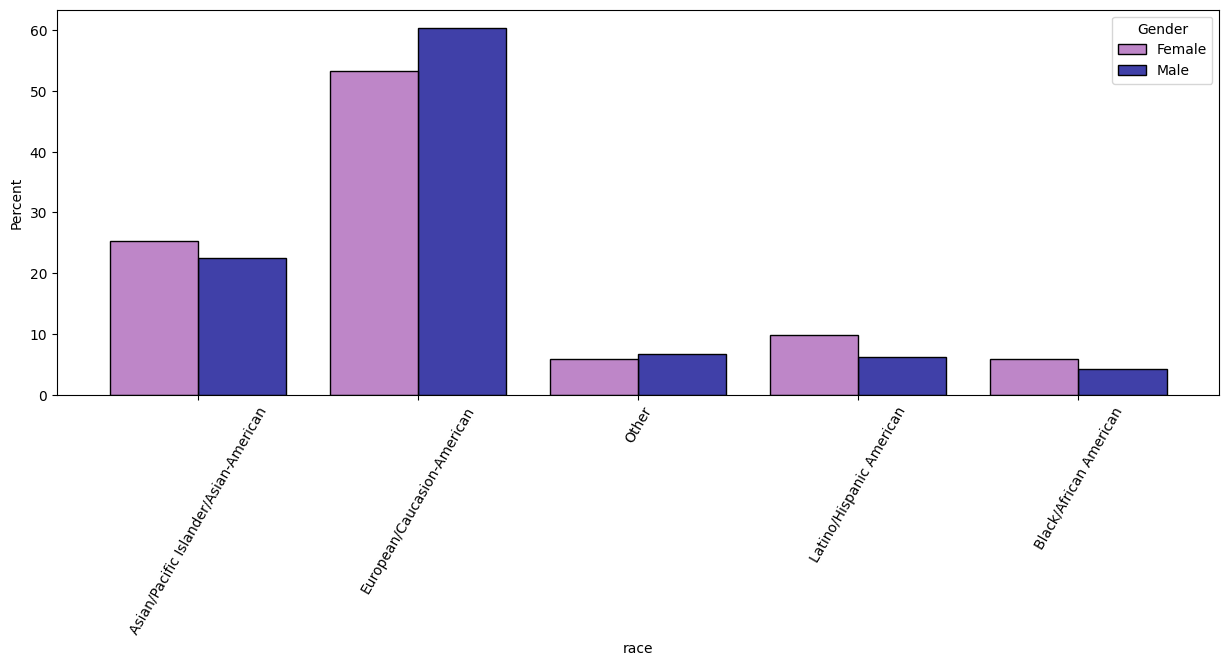

In [25]:
# Let's take a look at race
print(data['race'].value_counts())
print()

print(data['race'].value_counts(dropna=False, normalize=True) * 100)
print()

plt.figure(figsize=(15,5))
ax = sns.histplot(x = data['race'], hue=data['Gender'], multiple="dodge", 
                  stat = 'percent', palette=color_map, shrink = 0.8, common_norm=False)

plt.xticks(rotation=60)  # Rotation des labels de l'axe des x à 90 degrés
plt.show()

We can observe that over 56% of the participants are of European/Caucasian-American descent. While there is some bias present, it does not appear to significantly influence the decisions.

### Activities interested by Men Vs Women

In [26]:
# Define the activities of interest
activities_interested = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                         'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Select the columns of interest and drop rows with missing values (NaN)
activities_interested_dropna = data[activities_interested].dropna()

# Calculate the mean of each activity for each gender
activities_mean_by_gender = activities_interested_dropna.groupby(data['Gender']).mean().values

# 'activities_mean_by_gender' will be a 2D NumPy array with each row representing the mean values for each activity,
# and each column representing a gender (e.g., the first row for males and the second row for females).

In [28]:
atributes_gender = data[['Gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('Gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols

In [29]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities_mean_by_gender[0,:],
    name='Women',
    marker=dict(
        color='#A95EB6'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities_mean_by_gender[1,:],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='#00008b'
    )
)

data3 = [trace1, trace2]
layout = go.Layout(
    title='Interest by activities Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
py.iplot(fig, filename='barchart')

It's evident that sports, dining, reading, music, and movies are highly popular activities among both genders. Notably, each of these activities exhibits an almost equal representation of both females and males. This observation suggests that there is a balanced opportunity for individuals to connect with others who share similar interests.

# Let's analyse the goal

What are the factors that motivate individuals to participate in speed dating ?

In [31]:
data['goal'].value_counts()

goal
Seemed like a fun night out         3426
To meet new people                  3012
To get a date                        631
To say I did it                      510
Other                                419
Looking for serious relationship     301
Name: count, dtype: int64

In [32]:
data['match'].value_counts()

match
No     6998
Yes    1380
Name: count, dtype: int64

In [33]:
color_map2 = {'Yes':'#A95EB6', 'No':'#00008b'}
fig = px.histogram(x= data['goal'], barmode= 'group', color= data['match'], labels= data['goal'], color_discrete_map=color_map2)
fig.update_xaxes(type='category', title_text= 'Goal')
fig.update_layout(height = 700, width= 700,legend_title_text='Match', title=f"Count of matches/no-matches by goals")

The majority of participants attend speed dating events for a fun night out and to meet new people. 

However, is this the most conducive atmosphere for developing romantic connections ?

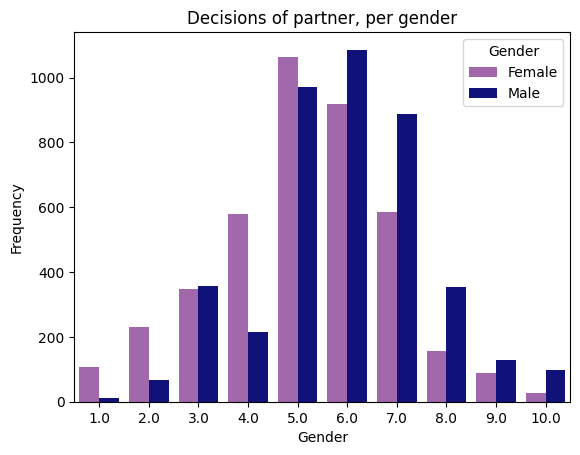

In [34]:
sns.countplot(x="exphappy", hue='Gender', data=data, palette=color_map
            ).set(title = 'Decisions of partner, per gender' , xlabel='Gender', ylabel='Frequency')
plt.show()

exphappy,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
match,,,,,,,,,,
No,101,252,604,673,1701,1653,1230,423,177,99
Yes,15,45,102,120,332,350,245,90,39,26


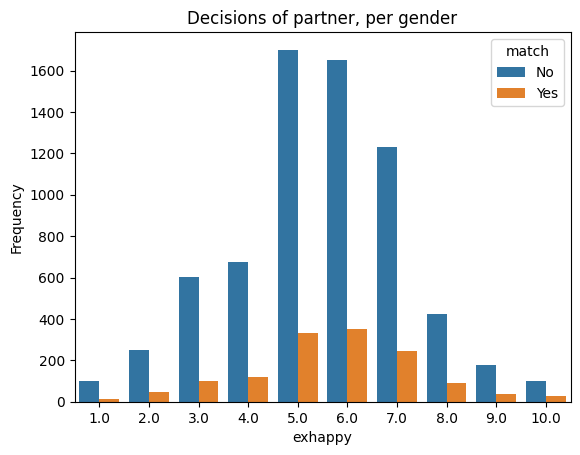

In [35]:
display(pd.crosstab(index=data["match"], columns=data["exphappy"]))
# Answer to "Would you like to see him again".
sns.countplot(x="exphappy", hue='match', data=data
            ).set(title = 'Decisions of partner, per gender' , xlabel='exhappy', ylabel='Frequency')
plt.show()

# Decisions

partner's decision,No,Yes
Gender,,
Female,2198,1986
Male,2665,1529


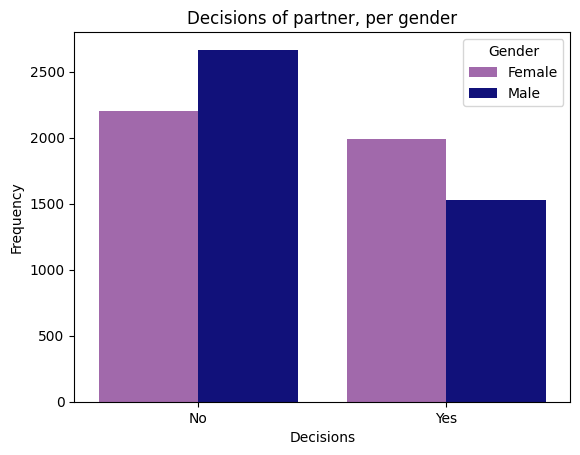

In [38]:
display(pd.crosstab(index=data["Gender"], columns=data["partner's decision"]))
# Answer to "Would you like to see him again".
sns.countplot(x="partner's decision", hue='Gender', data=data, palette=color_map
            ).set(title = 'Decisions of partner, per gender' , xlabel='Decisions', ylabel='Frequency')
plt.show()

/tmp/ipykernel_28029/1724633622.py:3: FutureWarning:

Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead



match,No,Yes
Gender,,
Female,3494,690
Male,3504,690


We Only have 16.47% chance of a match


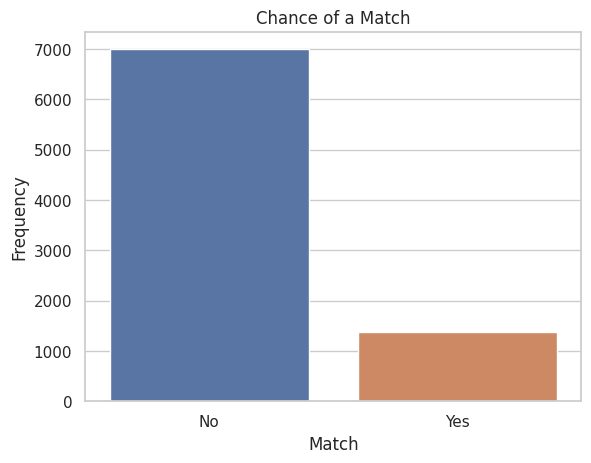

In [39]:
# Calculate the percentage of actual matches
cross_match = pd.crosstab(index=data['match'], columns="count")
date_match = int(cross_match.iloc[1])/(int(cross_match.iloc[1])+int(cross_match.iloc[0]))*100

# Create a countplot
sns.set(style="whitegrid")
sns.countplot(x='match', data=data).set(title='Chance of a Match', xlabel='Match', ylabel='Frequency')

# Display the crosstab for Gender and match
crosstab_gender_match = pd.crosstab(index=data['Gender'], columns=data['match'])
display(crosstab_gender_match)

# Display the chance of a match
print(f"We Only have {date_match:.2f}% chance of a match")

# Show the plot
plt.show()

In [ ]:
# Count for 1 partner saying yes but no match
no_match = len(data[(data["partner's decision"]=='No') & (data['dec']=='Yes')]) 
+ len(data[(data["partner's decision"]=='Yes') & (data['dec']=='No')])
disappointed_ratio = no_match / len(data.index)
display(f"{(disappointed_ratio*100):.2f}% said yes but didn't match !")
# The majority are men, since women were more selective
rejection_count = data['Gender'].loc[data['dec'] == 'Yes'][data["partner's decision"]=='No'].value_counts()
display(f"Men were rejected {(rejection_count[0])} times and women {rejection_count[1]} times")

"25.52% said yes but didn't match !"

'Men were rejected 1299 times and women 839 times'

In [ ]:
cross_second_date = pd.crosstab(index=data['date_3'],columns="count")
calc_second_date = int(cross_second_date.iloc[1][0])/(int(cross_second_date.iloc[1][0])+int(cross_second_date.iloc[0][0]))*100
# Still only 37.7% chance of a 2nd date even after a match
display(f"Only {calc_second_date:.2f}% chance of a second date")
# Higher numbers of actual 2nd dates than matches
# Females have more success
pd.crosstab(index=data['date_3'],columns="count")

'Only 17.88% chance of a second date'

col_0,count
date_3,
No,6880
Yes,1498


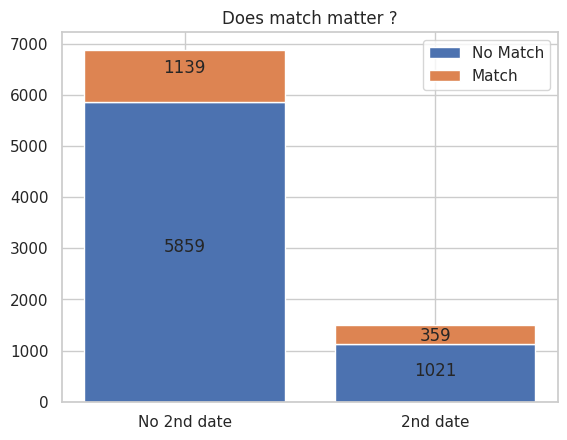

In [ ]:
# Match doesn't matter much ?
all_second_dates= data.date_3.groupby(data.match).value_counts()
Second_date_match = data.date_3[data['match']=='No'].value_counts()
Second_date_nomatch = data.date_3[data['match']=='Yes'].value_counts()
labels_second_date = 'No 2nd date','2nd date'

plt.title("Does match matter ?")
plt.bar(labels_second_date,Second_date_match)
plt.bar(labels_second_date,Second_date_nomatch, bottom = Second_date_match)
plt.legend(['No Match', 'Match'])
plt.text(0,all_second_dates[0]+(all_second_dates[1]/2), all_second_dates[1], horizontalalignment='center')
plt.text(1,all_second_dates[2]+(all_second_dates[3]/2), all_second_dates[3], horizontalalignment='center')
plt.text(0,(all_second_dates[0]/2), all_second_dates[0], horizontalalignment='center')
plt.text(1,(all_second_dates[2]/2), all_second_dates[2], horizontalalignment='center')
plt.show()

We can observe that very few participants who matched went for a second date. So, matching partners don't necessarily go on a second date.

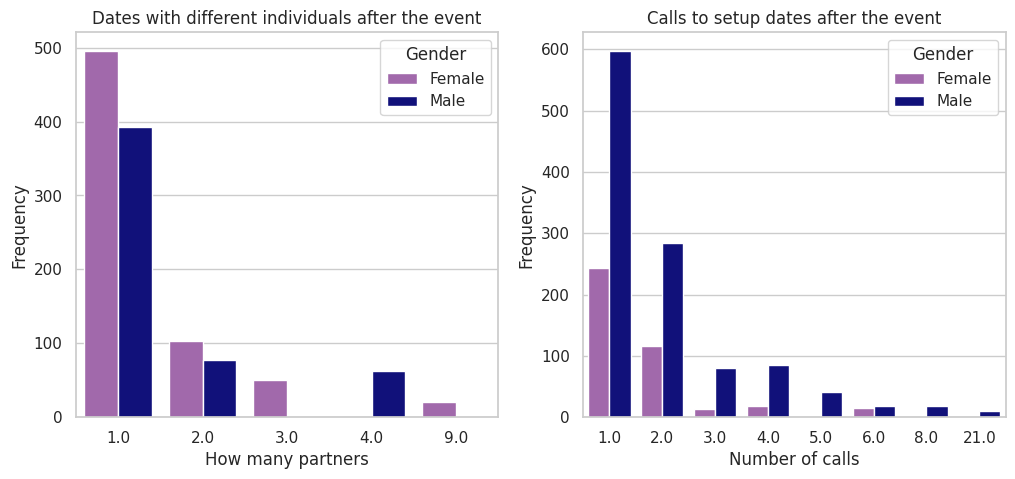

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
sns.countplot(x='numdat_3', hue='Gender',data=data[data['numdat_3']>0], ax=axs[0], palette=color_map
            ).set(title = 'Dates with different individuals after the event' , xlabel='How many partners', ylabel='Frequency')
sns.countplot(x='you_call', hue='Gender',data=data[data['you_call']>0], ax=axs[1], palette=color_map
            ).set(title = 'Calls to setup dates after the event' , xlabel='Number of calls', ylabel='Frequency')
plt.show()

# Most focus on 1 partner for a 2nd date, but for some the search hasn't ended !

Each interaction during the event provides participants with a 17.88% chance of securing a second date. If a match occurs (16.47% chance per interaction), this chance increases to 26.01%. Even without a match, there remains a 16.27% likelihood of a second date. Persistence doesn't go unrewarded! Interestingly, participants didn't heavily rely on event outcomes to shape their post-event plans.

After the event, most participants pursued only one individual for a subsequent date, potentially indicating positive outcomes. Conversely, a minority showed a tenacious approach, engaging in multiple attempts to find 'the one.' Some women even engaged in up to 9 dates with different partners, while certain men extended invitations to 21 different women! Men clearly demonstrated higher levels of persistence in this context.